# Basic Functionality

## pandas Data Analysis

## Prerequisites & Outcomes

**Prerequisites:**
- pandas Introduction

**Outcomes:**
- Be familiar with `datetime`
- Use built-in aggregation functions and create custom ones
- Use built-in Series transformation functions
- Use built-in scalar transformation functions
- Select subsets using boolean selection
- Apply the "want operator"

## Data Source

US state unemployment data from Bureau of Labor Statistics

## Setup

In [2]:
import pandas as pd

%matplotlib inline

pd.__version__

'2.3.3'

## Loading State Unemployment Data

In [5]:
# Load up the data -- this will take a couple seconds
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp_raw = pd.read_csv(url, parse_dates=["Date"])


unemp_raw.head()




,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0


Note: `parse_dates=["Date"]` tells pandas to load the Date column as a Python datetime type

## Examining the Raw Data

In [9]:
unemp_raw.head(n = 10)
unemp_raw.tail(n = 20)


,Date,state,LaborForce,UnemploymentRate
10780,2017-12-01,New York,9708580.0,4.7
10781,2017-12-01,New jersey,4513664.0,4.7
10782,2017-12-01,North Carolina,4966113.0,4.5
10783,2017-12-01,North Dakota,413573.0,2.6
10784,2017-12-01,Ohio,5782017.0,4.9
10785,2017-12-01,Oklahoma,1841801.0,4.1
10786,2017-12-01,Oregon,2120955.0,4.1
10787,2017-12-01,Pennsylvania,6418025.0,4.8
10788,2017-12-01,Rhode island,556267.0,4.5
10789,2017-12-01,South Carolina,2318724.0,4.2


Each row contains: date, state, labor force size, and unemployment rate

## Transforming the Data

We want to look at unemployment rates across different states over time.

This requires a pivot table transformation:

In [15]:
# Don't worry about the details here quite yet
unemp_all = (
    unemp_raw
    .reset_index()
    .pivot_table(index="Date", columns="state", values="UnemploymentRate")
)
unemp_all.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,4.7,6.3,4.1,4.4,5.0,2.8,2.8,3.5,3.7,3.7,...,2.4,3.7,4.6,3.1,2.7,2.6,4.9,5.8,3.2,4.1
2000-02-01,4.7,6.3,4.1,4.3,5.0,2.8,2.7,3.6,3.7,3.6,...,2.4,3.7,4.6,3.1,2.6,2.5,4.9,5.6,3.2,3.9
2000-03-01,4.6,6.3,4.0,4.3,5.0,2.7,2.6,3.6,3.7,3.6,...,2.4,3.8,4.5,3.1,2.6,2.4,5.0,5.5,3.3,3.9
2000-04-01,4.6,6.3,4.0,4.3,5.1,2.7,2.5,3.7,3.7,3.7,...,2.4,3.8,4.4,3.1,2.7,2.4,5.0,5.4,3.4,3.8
2000-05-01,4.5,6.3,4.0,4.2,5.1,2.7,2.4,3.7,3.7,3.7,...,2.4,3.9,4.3,3.2,2.7,2.3,5.1,5.4,3.5,3.8


## Filtering to Selected States

In [16]:
states = [
    "Arizona", "California", "Florida", "Illinois",
    "Michigan", "New York", "Texas"
]
unemp = unemp_all[states]
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


## Plotting the Data

<Axes: xlabel='Date'>

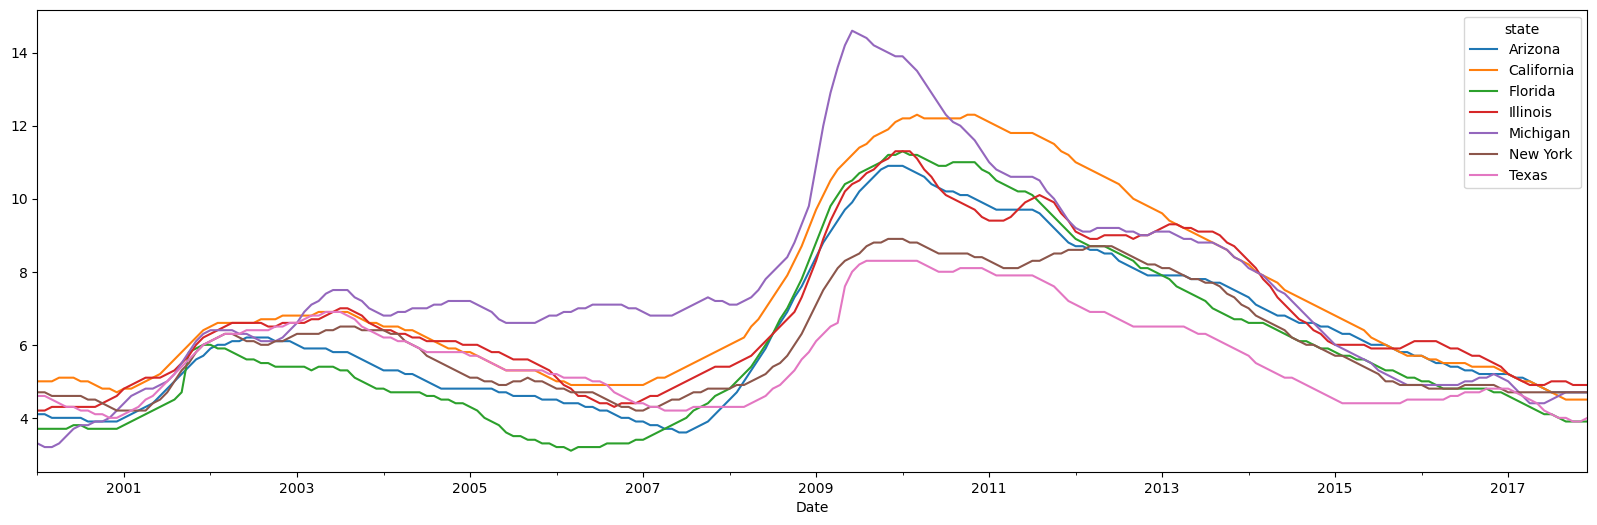

In [20]:
unemp.plot(figsize=(20, 6))

## Dates in pandas

The index has a nice format (YYYY-MM-DD) because its dtype is `datetime`

In [21]:
unemp.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=216, freq=None)

## Indexing with Dates

We can use string representations of dates to index:

In [24]:
# Data corresponding to a single date
unemp.loc["01/01/2000", :]

state
Arizona       4.1
California    5.0
Florida       3.7
Illinois      4.2
Michigan      3.3
New York      4.7
Texas         4.6
Name: 2000-01-01 00:00:00, dtype: float64

In [26]:
# Data for all days between New Years Day and June first in the year 2000
unemp.loc["01/01/2000":"06/01/2000", :]

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3
2000-06-01,4.0,5.1,3.8,4.3,3.7,4.6,4.3


## DataFrame Aggregations

**Aggregation**: An operation that combines multiple values into a single value

Example: Computing the mean of [0, 1, 2] returns 1

## Built-in Aggregations

pandas has many built-in aggregation functions:
- Mean (`mean`)
- Variance (`var`)
- Standard deviation (`std`)
- Minimum (`min`)
- Median (`median`)
- Maximum (`max`)
- etc...

## Aggregation Examples

In [35]:
# Default: aggregate each column
# unemp.mean(axis=1)


In [36]:
# Use axis=1 to aggregate by row
unemp.var(axis=1).head()

unemp_all.var(axis=1)

Date
2000-01-01    0.860016
2000-02-01    0.855873
2000-03-01    0.846139
2000-04-01    0.845229
2000-05-01    0.855759
                ...   
2017-08-01    0.836837
2017-09-01    0.849751
2017-10-01    0.865343
2017-11-01    0.869343
2017-12-01    0.866486
Length: 216, dtype: float64

## Writing Custom Aggregations

Two steps:
1. Write a Python function that takes a Series as input and outputs a single value
2. Call the `agg` method with the new function as an argument

## Custom Aggregation Example

Classify states as "high" or "low" unemployment based on whether their mean is above or below 6.5

In [44]:
# Step 1: Write the aggregation function
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the mean is above 6.5 and low if the mean is below 6.5
    """
    if s.mean() < 6.5:
        out = "Low"
    else:
        out = "High"
    
    return out

In [45]:
# Step 2: Apply it via the agg method
unemp.agg(high_or_low, axis=1)

Date
2000-01-01    Low
2000-02-01    Low
2000-03-01    Low
2000-04-01    Low
2000-05-01    Low
             ... 
2017-08-01    Low
2017-09-01    Low
2017-10-01    Low
2017-11-01    Low
2017-12-01    Low
Length: 216, dtype: object

## Multiple Aggregations

`agg` can accept multiple functions at once:

In [50]:
unemp.agg(["min", "max", "mean", "var", "std", high_or_low])

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
min,3.6,4.5,3.1,4.2,3.2,4.2,3.9
max,10.9,12.3,11.3,11.3,14.6,8.9,8.3
mean,6.301389,7.299074,6.048611,6.822685,7.492593,6.102315,5.69537
var,4.179021,6.039162,5.780556,3.846785,6.81734,2.29353,1.663234
std,2.044265,2.457471,2.404279,1.961322,2.611004,1.51444,1.289664
high_or_low,Low,High,Low,High,High,Low,Low


## Transforms

Many operations produce a new Series rather than a single value.

Examples:
- Compute percentage change in unemployment from month to month
- Calculate cumulative sum of elements in each column

## Built-in Transforms

pandas includes many transform functions:
- Cumulative sum/max/min/product (`cumsum`, `cummin`, `cummax`, `cumprod`)
- Difference (`diff`)
- Elementwise operations (`+`, `-`, `*`, `/`)
- Percent change (`pct_change`)
- Number of occurrences (`value_counts`)
- Absolute value (`abs`)

## Transform Examples

In [51]:
unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,4.1,5.0,3.7,4.2,3.3,4.7,4.6
2000-02-01,4.1,5.0,3.7,4.2,3.2,4.7,4.6
2000-03-01,4.0,5.0,3.7,4.3,3.2,4.6,4.5
2000-04-01,4.0,5.1,3.7,4.3,3.3,4.6,4.4
2000-05-01,4.0,5.1,3.7,4.3,3.5,4.6,4.3


In [54]:
unemp.pct_change(fill_method=None).head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,0.00000,0.00,0.0,0.00000,-0.030303,0.000000,0.000000
2000-03-01,-0.02439,0.00,0.0,0.02381,0.000000,-0.021277,-0.021739
2000-04-01,0.00000,0.02,0.0,0.00000,0.031250,0.000000,-0.022222
2000-05-01,0.00000,0.00,0.0,0.00000,0.060606,0.000000,-0.022727


In [ ]:
unemp.diff().head()

## Transform Categories

1. **Series transforms**: Functions that take one Series and produce another Series (index can change)
2. **Scalar transforms**: Functions that take a single value and produce a single value (e.g., `abs`)

## Custom Series Transforms

Two steps:
1. Write a Python function that takes a Series and outputs a new Series
2. Pass the function to the `apply` method (or `transform`)

## Example: Standardizing Data

Transform unemployment data to have mean 0 and standard deviation 1

In [55]:
# Step 1: Write the Series transform function
def standardize_data(x):
    """
    Changes the data in a Series to become mean 0 with standard deviation 1
    """
    mu = x.mean()
    std = x.std()
    
    return (x - mu)/std

In [61]:
# Step 2: Apply via the apply method
std_unemp = unemp.apply(standardize_data)
std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.605740,-0.925962,-0.849345
2000-02-01,-1.076861,-0.935545,-0.976846,-1.337203,-1.644039,-0.925962,-0.849345
2000-03-01,-1.125778,-0.935545,-0.976846,-1.286217,-1.644039,-0.991993,-0.926885
2000-04-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.605740,-0.991993,-1.004424
2000-05-01,-1.125778,-0.894853,-0.976846,-1.286217,-1.529141,-0.991993,-1.081964


## Finding Extreme Values

In [63]:
# Take absolute value
abs_std_unemp = std_unemp.abs()
abs_std_unemp.head()

state,Arizona,California,Florida,Illinois,Michigan,New York,Texas
Date,,,,,,,
2000-01-01,1.076861,0.935545,0.976846,1.337203,1.605740,0.925962,0.849345
2000-02-01,1.076861,0.935545,0.976846,1.337203,1.644039,0.925962,0.849345
2000-03-01,1.125778,0.935545,0.976846,1.286217,1.644039,0.991993,0.926885
2000-04-01,1.125778,0.894853,0.976846,1.286217,1.605740,0.991993,1.004424
2000-05-01,1.125778,0.894853,0.976846,1.286217,1.529141,0.991993,1.081964


In [65]:
# Find date when unemployment was "most different from normal" for each state
def idxmax(x):
    return x.idxmax()

abs_std_unemp.agg(idxmax)

state
Arizona      2009-11-01
California   2010-03-01
Florida      2010-01-01
Illinois     2009-12-01
Michigan     2009-06-01
New York     2009-11-01
Texas        2009-08-01
dtype: datetime64[ns]

## Custom Scalar Transforms

Two steps:
1. Define a function that takes a scalar and produces a scalar
2. Pass this function to the `map` method

## Boolean Selection

We can select data based on conditions met by the data itself.

Examples:
- Individuals older than 18
- Data from particular time periods
- Data during a recession
- Specific product or customer IDs

## Boolean Selection Examples

In [ ]:
unemp_small = unemp.head()
unemp_small

In [ ]:
# List of booleans selects rows
unemp_small.loc[[True, True, True, False, False]]

## Creating Boolean Series

Use conditional statements to construct Series of booleans:

In [ ]:
unemp_small["Texas"] < 4.5

In [ ]:
# Use boolean Series to extract rows
unemp_small.loc[unemp_small["Texas"] < 4.5]

## Comparing Columns

In [ ]:
unemp_small["New York"] > unemp_small["Texas"]

In [ ]:
big_NY = unemp_small["New York"] > unemp_small["Texas"]
unemp_small.loc[big_NY]

## Multiple Conditions

Instead of `and` and `or`, use:
- `(bool_series1) & (bool_series2)` for AND
- `(bool_series1) | (bool_series2)` for OR

In [ ]:
small_NYTX = (unemp_small["Texas"] < 4.7) & (unemp_small["New York"] < 4.7)
small_NYTX

In [ ]:
unemp_small[small_NYTX]

## The `isin` Method

Check if values match any of several fixed values:

In [ ]:
unemp_small["Michigan"].isin([3.3, 3.2])

In [ ]:
# Select full rows where this Series is True
unemp_small.loc[unemp_small["Michigan"].isin([3.3, 3.2])]

## `.any` and `.all` Methods

- `.any()`: Returns True if at least one value is True
- `.all()`: Returns True only when all values are True

## The "Want Operator"

A concept from Nobel Laureate Tom Sargent for clear analysis:

1. State the goal: **Want:** [clear objective]
2. Work backwards to identify necessary steps
3. Execute the plan

## Example: High Unemployment Months

**Want:** Count months where all states had unemployment above 6.5%

**Plan:**
1. Sum True values in a Series indicating dates with all high unemployment
2. Build the Series using `.all` on a boolean DataFrame
3. Build the DataFrame using `>` comparison

## Executing the Plan

In [ ]:
# Step 3: construct the DataFrame of bools
high = unemp > 6.5
high.head()

In [ ]:
# Step 2: use .all method on axis=1
all_high = high.all(axis=1)
all_high.head()

In [ ]:
# Step 1: Call .sum to count True values
msg = "Out of {} months, {} had high unemployment across all states"
print(msg.format(len(all_high), all_high.sum()))

## Exercises

Practice exercises are included in the notebook cells below

## Exercise 1

- What is the minimum unemployment rate at each date across all states?
- What was the median unemployment rate in each state?
- What was the maximum unemployment rate? In which state and month?
- Classify each state as high or low volatility (variance above/below 4)

In [83]:
# min unemployment rate by date

In [84]:
# median unemployment rate by state


In [100]:
# max unemployment rate across all states and year


In [ ]:
#low or high volatility


## Exercise 3

Classify unemployment as high (> 6.5), medium (4.5 < x <= 6.5), or low (<= 4.5)

1. Write a function to classify a single number
2. Pass to `map` and save as `unemp_bins`
3. Count occurrences of each classification per state and create a bar chart
4. Count how many states had each classification in each month

In [ ]:
# Part 2: Pass to map
# unemp_bins = unemp.map(...)

In [ ]:
# Part 3: Count occurrences and create bar chart

In [ ]:
# Part 4: Count by date instead of state

## Exercise 4

- For one state, determine mean unemployment during "Low", "Medium", and "High" times
- Which states perform best during "bad times" (when mean unemployment > 7)?

In [ ]:
# Your code here

## Summary

Key concepts covered:
- Working with datetime indices
- Built-in and custom aggregations
- Built-in and custom transforms
- Boolean selection
- The "want operator" for structured analysis